<a href="https://colab.research.google.com/github/UjalaWKarim/Sales_Sample_Dataset/blob/main/Visualization_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin-1')

In [13]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [15]:
missing = df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [16]:
# Droping ADDRESSLINE2 column as its optional
df.drop(columns=['ADDRESSLINE2'], inplace=True)

# Filling missing STATE and TERRITORY with 'Unknown'
df['STATE'].fillna('Unknown', inplace=True)
df['TERRITORY'].fillna('Unknown', inplace=True)

# Filling missing POSTALCODE with '00000'
df['POSTALCODE'].fillna('00000', inplace=True)

<ipython-input-16-6131b163c00a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STATE'].fillna('Unknown', inplace=True)
<ipython-input-16-6131b163c00a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [17]:
missing = df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


In [8]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [19]:
# Converting orderdate to datetime so we can work with dates
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Dropping any rows where orderdate is still null after conversion (if any)
df.dropna(subset=['ORDERDATE'], inplace=True)

In [21]:
# Creating a new column TotalRevenue
df['TotalRevenue'] = df['QUANTITYORDERED'] * df['PRICEEACH']

In [22]:
# Creating a new column MonthYear
df['MonthYear'] = df['ORDERDATE'].dt.to_period('M')

In [23]:
# Cleaning up strings
df['PRODUCTLINE'] = df['PRODUCTLINE'].str.strip().str.title()
df['COUNTRY'] = df['COUNTRY'].str.strip().str.title()
df['DEALSIZE'] = df['DEALSIZE'].str.strip().str.upper()

In [28]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

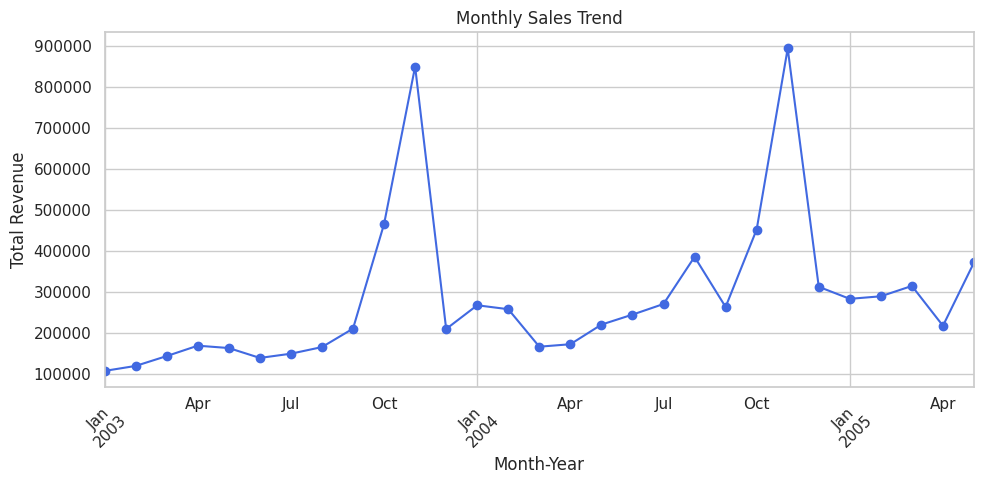

In [32]:
# Monthly Sales Trend
monthly_sales = df.groupby('MonthYear')['TotalRevenue'].sum()

monthly_sales.plot(kind='line', marker='o', title="Monthly Sales Trend", color='royalblue')
plt.ylabel("Total Revenue")
plt.xlabel("Month-Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-31-db7cb7b24565>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productline_sales.values, y=productline_sales.index, palette='coolwarm')


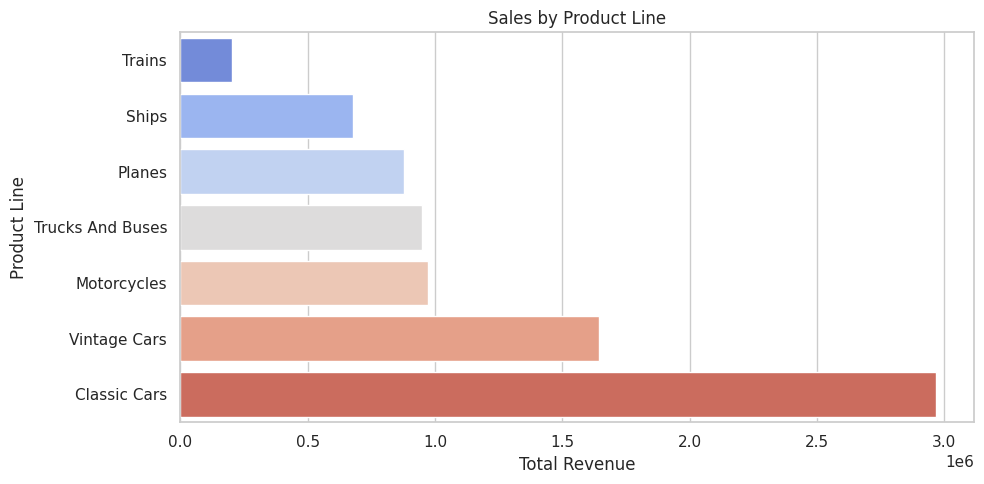

In [31]:
# Sales by Product Line
productline_sales = df.groupby('PRODUCTLINE')['TotalRevenue'].sum().sort_values()

sns.barplot(x=productline_sales.values, y=productline_sales.index, palette='coolwarm')
plt.title("Sales by Product Line")
plt.xlabel("Total Revenue")
plt.ylabel("Product Line")
plt.tight_layout()
plt.show()

<ipython-input-35-db7cb7b24565>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productline_sales.values, y=productline_sales.index, palette='coolwarm')


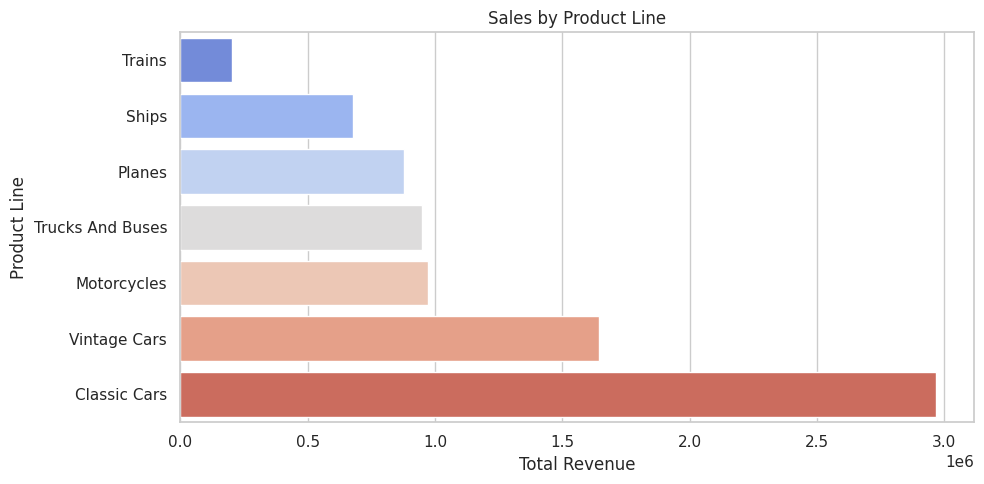

In [35]:
# Sales by Product Line
productline_sales = df.groupby('PRODUCTLINE')['TotalRevenue'].sum().sort_values()

sns.barplot(x=productline_sales.values, y=productline_sales.index, palette='coolwarm')
plt.title("Sales by Product Line")
plt.xlabel("Total Revenue")
plt.ylabel("Product Line")
plt.tight_layout()
plt.show()

<ipython-input-36-553e3358e45b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEALSIZE', y='TotalRevenue', data=df, palette='Set2')


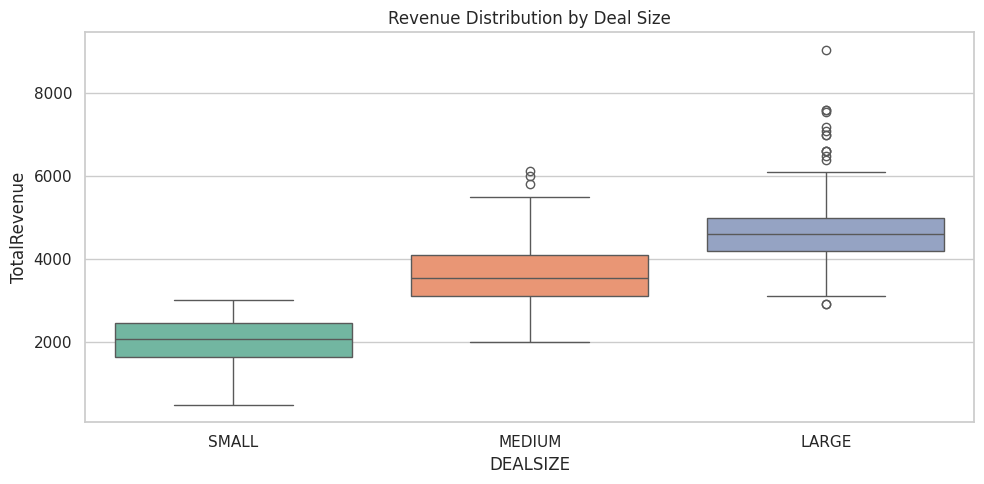

In [36]:
# Sales Distribution by Deal Size
sns.boxplot(x='DEALSIZE', y='TotalRevenue', data=df, palette='Set2')
plt.title("Revenue Distribution by Deal Size")
plt.tight_layout()
plt.show()

<ipython-input-37-048aad8aaf6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')


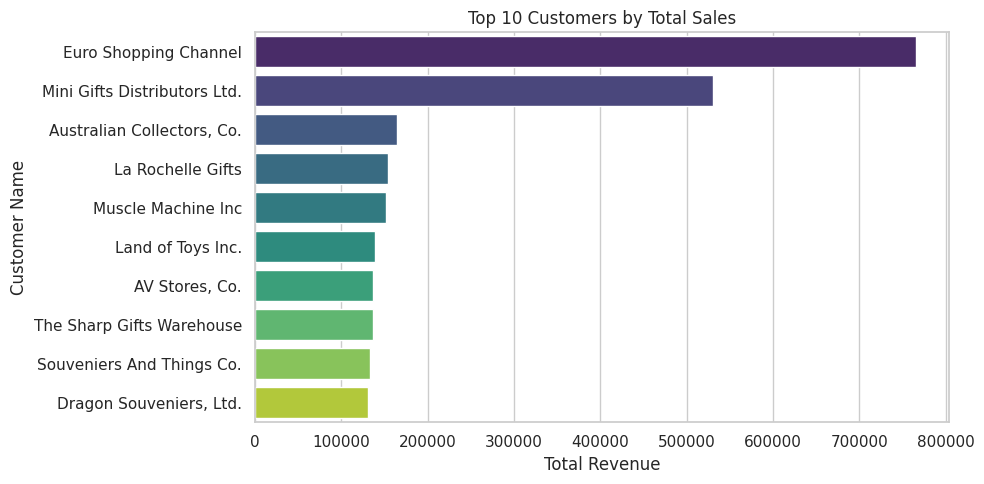

In [37]:
# Top 10 Customers by Total Sales
top_customers = df.groupby('CUSTOMERNAME')['TotalRevenue'].sum().nlargest(10)

sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Total Revenue")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()

<ipython-input-38-6981881a407d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette='magma')


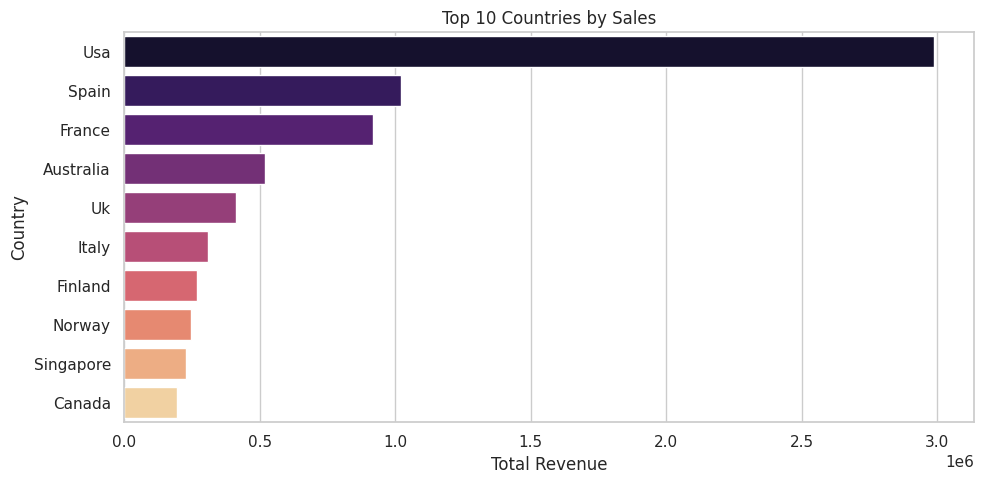

In [38]:
# Top 10 Countries by Sales
country_sales = df.groupby('COUNTRY')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=country_sales.values, y=country_sales.index, palette='magma')
plt.title("Top 10 Countries by Sales")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

<ipython-input-41-d5c1ab4a6a7e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_sales.index, y=month_sales.values, palette='crest')


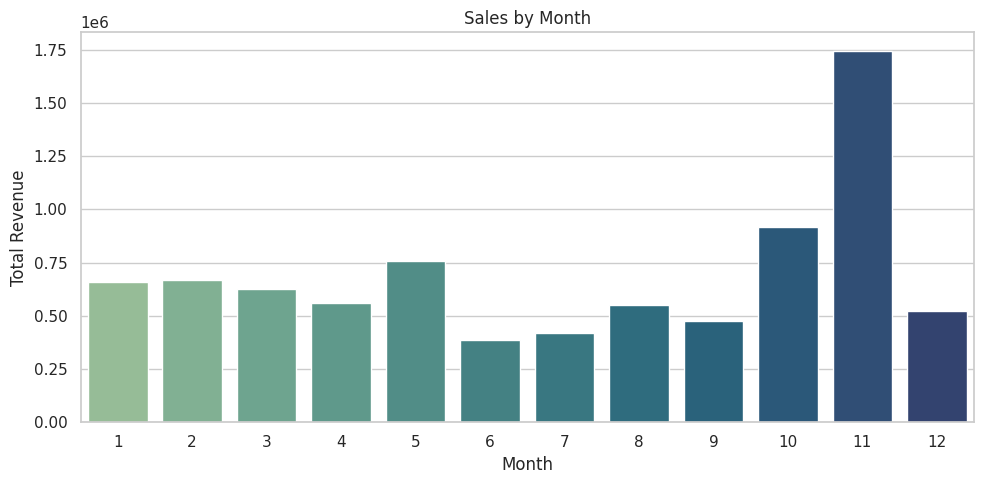

In [41]:
# Sales by Month
month_sales = df.groupby('MONTH_ID')['TotalRevenue'].sum()

sns.barplot(x=month_sales.index, y=month_sales.values, palette='crest')
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

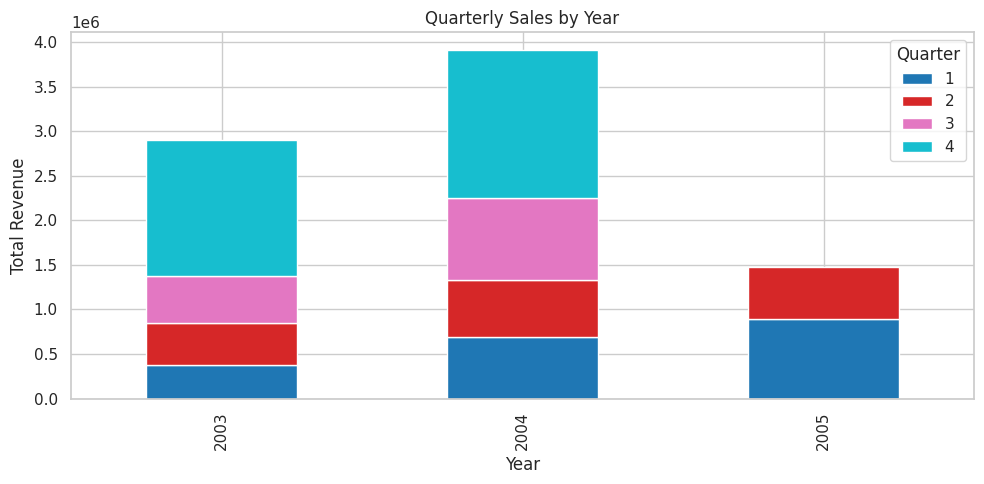

In [43]:
# Quarterly Sales by Year
quarterly = df.groupby(['YEAR_ID', 'QTR_ID'])['TotalRevenue'].sum().unstack()

quarterly.plot(kind='bar', stacked=True, colormap='tab10')
plt.title("Quarterly Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.legend(title="Quarter")
plt.tight_layout()
plt.show()

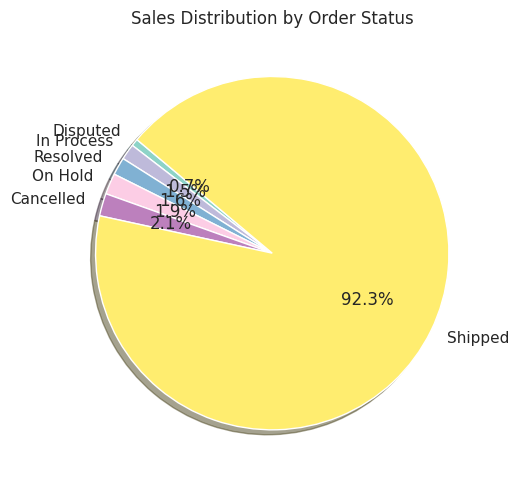

In [45]:
# Status-wise Sales Distribution
status_sales = df.groupby('STATUS')['TotalRevenue'].sum().sort_values()

status_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True, cmap='Set3')
plt.title("Sales Distribution by Order Status")
plt.ylabel("")
plt.tight_layout()
plt.show()

<ipython-input-46-b20a480df3ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='rocket')


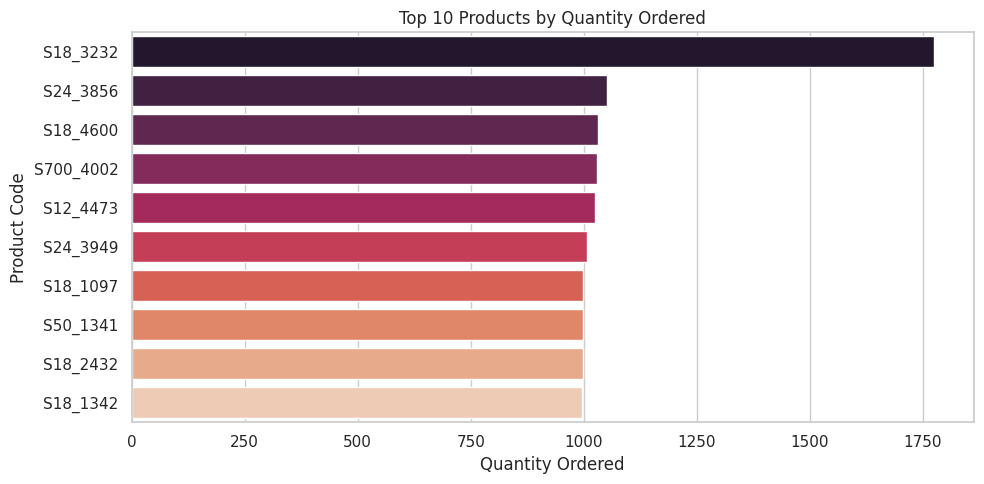

In [46]:
# Top 10 Most Ordered Products
top_products = df.groupby('PRODUCTCODE')['QUANTITYORDERED'].sum().nlargest(10)

sns.barplot(x=top_products.values, y=top_products.index, palette='rocket')
plt.title("Top 10 Products by Quantity Ordered")
plt.xlabel("Quantity Ordered")
plt.ylabel("Product Code")
plt.tight_layout()
plt.show()

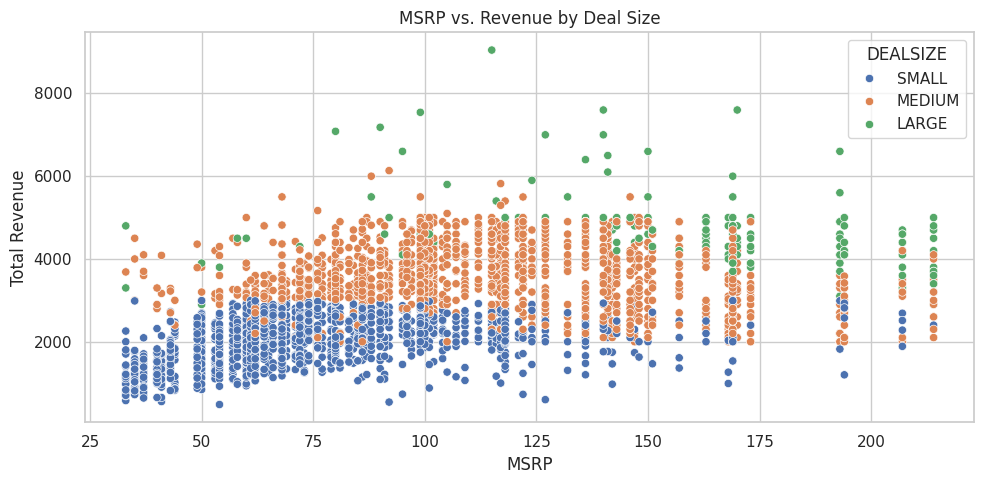

In [47]:
# Sales by MSRP
sns.scatterplot(x='MSRP', y='TotalRevenue', data=df, hue='DEALSIZE', palette='deep')
plt.title("MSRP vs. Revenue by Deal Size")
plt.xlabel("MSRP")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

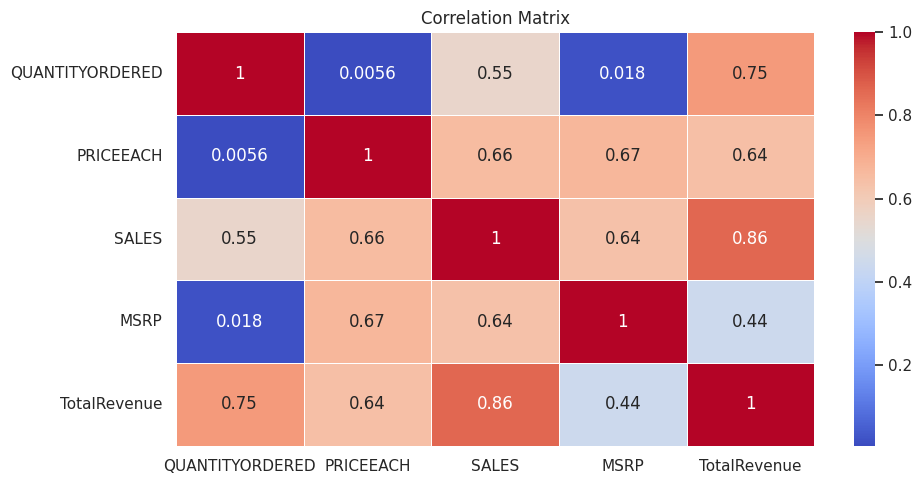

In [39]:
corr = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'TotalRevenue']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()
